<a href="https://colab.research.google.com/github/elephanti/hands-on-llms/blob/main/Entropix_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

In [6]:
!pip install poetry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.8/453.8 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 99.2 MB/s eta 0:00:00
  Attempting uninstall: keyring
    Found existing installation: keyring 23.5.0
    Uninstalling keyring-23.5.0:
      Successfully uninstalled keyring-23.5.0


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!git clone https://github.com/elephanti/hands-on-llms.git

Cloning into 'hands-on-llms'...
remote: Enumerating objects: 1447, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 1447 (delta 213), reused 175 (delta 173), pack-reused 1173 (from 2)
Receiving objects: 100% (1447/1447), 26.71 MiB | 12.96 MiB/s, done.
Resolving deltas: 100% (879/879), done.


In [1]:
import os
os.chdir("hands-on-llms")


In [4]:
!git pull

Already up to date.


# Financial Bot (Inference)

In [2]:
os.chdir("modules/financial_bot")

Set env vars

In [ ]:
import os

def create_env_file(filepath, env_vars):
    with open(filepath, 'w') as f:
        for key, value in env_vars.items():
            f.write(f'{key}="{value}"\n')

env_vars = {
    "COMET_API_KEY": "",
    "COMET_WORKSPACE": "avital-livshits",
    "COMET_PROJECT_NAME": "mlops-project",
    "QDRANT_URL": "https://fb6f58d6-fb02-4be4-a021-574f70de5d7c.eu-central-1-0.aws.cloud.qdrant.io",
    "QDRANT_API_KEY": "",
    "OPENAI_API_KEY": ""
}

# Create the .env file in the current directory
create_env_file(".env", env_vars)

In [3]:
!make install

Streaming output truncated to the last 5000 lines.
  - Installing yarl (1.9.2): Pending...
  - Installing yarl (1.9.2): Pending...
  - Installing tqdm (4.66.1): Downloading... 0%
  - Installing yarl (1.9.2): Pending...
  - Installing yarl (1.9.2): Pending...
  - Installing tqdm (4.66.1): Downloading... 100%
  - Installing yarl (1.9.2): Pending...
  - Installing yarl (1.9.2): Pending...
  - Installing tqdm (4.66.1): Installing...
  - Installing yarl (1.9.2): Pending...
  - Installing yarl (1.9.2): Downloading... 0%
  - Installing numpy (1.25.2): Downloading... 20%
  - Installing mypy-extensions (1.0.0)
  - Installing packaging (23.1)
  - Installing pyyaml (6.0.1): Installing...
  - Installing referencing (0.30.2)
  - Installing requests (2.31.0)
  - Installing six (1.16.0)
  - Installing tqdm (4.66.1): Installing...
  - Installing yarl (1.9.2): Downloading... 0%
  - Installing mpmath (1.3.0)
  - Installing numpy (1.25.2): Downloading... 20%
  - Installing mypy-extensions (1.0.0)
  - Ins

In [13]:
!make run

Running financial_bot...
poetry run python -m tools.bot \
	--about_me "I am a student and I have some money that I want to invest." \
	--question "Should I consider investing in stocks from the Tech Sector?" \
	--history "[[\"What is your opinion on investing in startup companies?\", \"Startup investments can be very lucrative, but they also come with a high degree of risk. It is important to do your due diligence and research the company thoroughly before investing.\"]]" \
	--debug False
2024-12-22 11:08:16,671 - INFO - Initializing env vars...
2024-12-22 11:08:16,671 - INFO - Loading environment variables from: .env
2024-12-22 11:08:23,234 - INFO - NumExpr defaulting to 2 threads.
2024-12-22 11:08:27,682 - INFO - Created a temporary directory at /tmp/tmpjqhp2vwe
2024-12-22 11:08:27,682 - INFO - Writing /tmp/tmpjqhp2vwe/_remote_module_non_scriptable.py
2024-12-22 11:08:28,584 - INFO - ####################################################################################################


To run eval on baseline model, you can uncomment lines 891-899 in models.py

In [25]:
!make eval_bot

Evaluating financial_bot...
poetry run python -m tools.bot_eval \
	--testset_path "../training_pipeline/dataset/testing_data.json"
2024-12-22 12:35:19,142 - INFO - Initializing env vars...
2024-12-22 12:35:19,142 - INFO - Loading environment variables from: .env
2024-12-22 12:35:27,879 - INFO - Created a temporary directory at /tmp/tmpt26ckzuj
2024-12-22 12:35:27,880 - INFO - Writing /tmp/tmpt26ckzuj/_remote_module_non_scriptable.py
2024-12-22 12:35:28,430 - INFO - ####################################################################################################
2024-12-22 12:35:28,448 - INFO - GPU 0 memory available: 15099 MiB
2024-12-22 12:35:28,449 - INFO - Available RAM: 10.11 GB
2024-12-22 12:35:28,449 - INFO - ####################################################################################################
2024-12-22 12:35:28,449 - INFO - Building QDrant Client
Loading checkpoint shards: 100% 2/2 [01:18<00:00, 39.09s/it]
You are resizing the embedding layer without providing

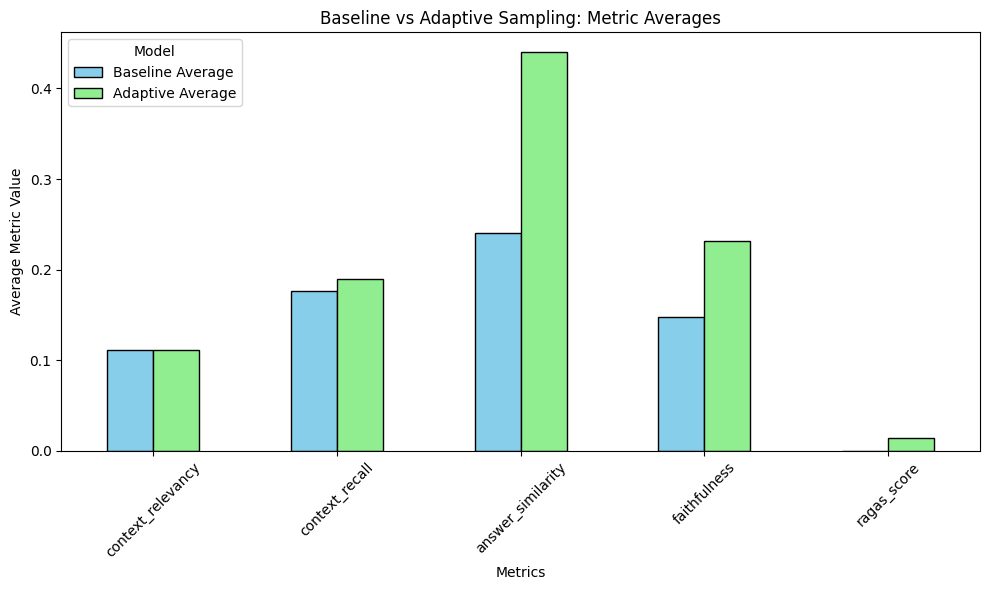

Examples where Faithfulness improved:
                                            question  faithfulness
0  \nWhat are the risks of investing in cryptocur...          0.50
1             \nIs Bitcoin a good investment option?          0.25
2  \nShould I consider real estate investment tru...          1.00
3  \nShould I explore cryptocurrency investments ...          0.60
4  \nWhat's your opinion on the recent performanc...          0.10

Examples where Answer Similarity improved:
                                            question  answer_similarity
0  \nDo you think investing in Middle Eastern tec...                1.0
1             \nIs Bitcoin a good investment option?                1.0
2  \nAre bonds or fixed-income securities suitabl...                1.0
3  \nShould I explore cryptocurrency investments ...                1.0
4  \nWhat's your opinion on the recent performanc...                1.0


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the JSON files
with open('results_20241222-124628.json', 'r') as f:
    adaptive_results = json.load(f)

with open('baseline_results_20241222-121533.json', 'r') as f:
    baseline_results = json.load(f)

# Convert to DataFrames for comparison
adaptive_df = pd.DataFrame(adaptive_results)
baseline_df = pd.DataFrame(baseline_results)

# Extract metrics into separate DataFrames
adaptive_metrics_fixed = pd.json_normalize(adaptive_df['metrics']).assign(question=adaptive_df['question'])
baseline_metrics_fixed = pd.json_normalize(baseline_df['metrics']).assign(question=baseline_df['question'])

# Calculate average metrics for each dataset
adaptive_avg_metrics = adaptive_metrics_fixed[['context_relevancy', 'context_recall', 'answer_similarity', 'faithfulness', 'ragas_score']].mean()
baseline_avg_metrics = baseline_metrics_fixed[['context_relevancy', 'context_recall', 'answer_similarity', 'faithfulness', 'ragas_score']].mean()

# Calculate improvements or regressions
metric_comparison = pd.DataFrame({
    'Metric': adaptive_avg_metrics.index,
    'Baseline Average': baseline_avg_metrics.values,
    'Adaptive Average': adaptive_avg_metrics.values,
    'Improvement': adaptive_avg_metrics.values - baseline_avg_metrics.values
})

# Visualization of metric improvements
fig, ax = plt.subplots(figsize=(10, 6))
metric_comparison.plot(
    x='Metric',
    y=['Baseline Average', 'Adaptive Average'],
    kind='bar',
    ax=ax,
    color=['skyblue', 'lightgreen'],
    edgecolor='black'
)
plt.title("Baseline vs Adaptive Sampling: Metric Averages")
plt.ylabel("Average Metric Value")
plt.xlabel("Metrics")
plt.xticks(rotation=45)
plt.legend(title="Model", loc='upper left')
plt.tight_layout()
plt.show()

# Identify samples where faithfulness or answer similarity improved
improved_faithfulness = adaptive_metrics_fixed[
    (adaptive_metrics_fixed['faithfulness'] > baseline_metrics_fixed['faithfulness'])
].reset_index()
improved_answer_similarity = adaptive_metrics_fixed[
    (adaptive_metrics_fixed['answer_similarity'] > baseline_metrics_fixed['answer_similarity'])
].reset_index()

# Show examples of improved faithfulness or answer similarity
faithfulness_examples = improved_faithfulness[['question', 'faithfulness']]
answer_similarity_examples = improved_answer_similarity[['question', 'answer_similarity']]

print("Examples where Faithfulness improved:")
print(faithfulness_examples.head())

print("\nExamples where Answer Similarity improved:")
print(answer_similarity_examples.head())

In [37]:
# Convert the provided data to a DataFrame
with open('baseline_results_20241222-121533.json', 'r') as f:
    baseline_results = json.load(f)
baseline_data = [
    {
        "question": item["question"],
        "context": item["context"],
        "response": item["response"],
        "ground_truth": item["ground_truth"],
        "metrics": item["metrics"]
    }
    for item in baseline_results
]

# Create DataFrame
baseline_df = pd.DataFrame([
    {
        "question": item["question"],
        "context": item["context"],
        "response": item["response"],
        "ground_truth": item["ground_truth"],
        **item["metrics"]
    }
    for item in baseline_data
])

# Calculate average metrics
avg_metrics = baseline_df[["context_relevancy", "context_recall", "answer_similarity", "faithfulness", "ragas_score"]].mean()

# Calculate metrics with proper formatting
metrics_summary = pd.DataFrame({
    "Metric": avg_metrics.index,
    "Average": avg_metrics.values
}).round(3)

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Metrics Summary:
           Metric  Average
context_relevancy    0.111
   context_recall    0.177
answer_similarity    0.240
     faithfulness    0.147
      ragas_score    0.000


In [34]:
# Convert the provided data to a DataFrame
with open('results_20241222-124628.json', 'r') as f:
    entropix_results = json.load(f)
entropix_data = [
    {
        "question": item["question"],
        "context": item["context"],
        "response": item["response"],
        "ground_truth": item["ground_truth"],
        "metrics": item["metrics"]
    }
    for item in entropix_results
]

# Create DataFrame
entropix_df = pd.DataFrame([
    {
        "question": item["question"],
        "context": item["context"],
        "response": item["response"],
        "ground_truth": item["ground_truth"],
        **item["metrics"]
    }
    for item in entropix_data
])

# Calculate average metrics
avg_metrics = entropix_df[["context_relevancy", "context_recall", "answer_similarity", "faithfulness", "ragas_score"]].mean()

# Calculate metrics with proper formatting
metrics_summary = pd.DataFrame({
    "Metric": avg_metrics.index,
    "Average": avg_metrics.values
}).round(3)

print("\nMetrics Summary:")
print(metrics_summary.to_string(index=False))


Metrics Summary:
           Metric  Average
context_relevancy    0.111
   context_recall    0.189
answer_similarity    0.440
     faithfulness    0.232
      ragas_score    0.015


In [35]:
entropix_df.to_csv("entropix.csv")

In [38]:
baseline_df.to_csv("baseline.csv")

In [40]:

import pandas as pd

# Assuming entropix_df and baseline_df are already created from the previous code

# Merge the DataFrames on the 'question' column
merged_df = pd.merge(entropix_df, baseline_df, on='question', suffixes=('_entropix', '_baseline'))

# Filter for rows where Entropix has better faithfulness or answer similarity
better_entropix = merged_df[
    (merged_df['faithfulness_entropix'] > merged_df['faithfulness_baseline']) |
    (merged_df['answer_similarity_entropix'] > merged_df['answer_similarity_baseline'])
]

# Print the questions and scores
print("Questions where Entropix has better faithfulness or answer similarity:")
for index, row in better_entropix.iterrows():
    print(f"Question: {row['question']}")
    print(f"  Entropix Faithfulness: {row['faithfulness_entropix']:.4f}, Baseline Faithfulness: {row['faithfulness_baseline']:.4f}")
    print(f"  Entropix Answer Similarity: {row['answer_similarity_entropix']:.4f}, Baseline Answer Similarity: {row['answer_similarity_baseline']:.4f}")
    print("-" * 20)

Questions where Entropix has better faithfulness or answer similarity:
Question: 
Do you think investing in Middle Eastern tech startups is a good idea?
  Entropix Faithfulness: 0.0000, Baseline Faithfulness: 0.0000
  Entropix Answer Similarity: 1.0000, Baseline Answer Similarity: 0.0000
--------------------
Question: 
What are the risks of investing in cryptocurrencies?
  Entropix Faithfulness: 0.5000, Baseline Faithfulness: 0.4000
  Entropix Answer Similarity: 1.0000, Baseline Answer Similarity: 1.0000
--------------------
Question: 
Is Bitcoin a good investment option?
  Entropix Faithfulness: 0.2500, Baseline Faithfulness: 0.0000
  Entropix Answer Similarity: 1.0000, Baseline Answer Similarity: 0.0000
--------------------
Question: 
Are bonds or fixed-income securities suitable for my investment goals?
  Entropix Faithfulness: 0.2500, Baseline Faithfulness: 0.5000
  Entropix Answer Similarity: 1.0000, Baseline Answer Similarity: 0.0000
--------------------
Question: 
Should I consi

In [41]:
# Assuming entropix_df and baseline_df are already created from the previous code

# Merge the DataFrames on the 'question' column
merged_df = pd.merge(entropix_df, baseline_df, on='question', suffixes=('_entropix', '_baseline'))

# Filter for rows where baseline has better faithfulness or answer similarity
better_baseline = merged_df[
    (merged_df['faithfulness_baseline'] > merged_df['faithfulness_entropix']) |
    (merged_df['answer_similarity_baseline'] > merged_df['answer_similarity_entropix'])
]

# Print the questions and scores
print("Questions where Baseline has better faithfulness or answer similarity:")
for index, row in better_baseline.iterrows():
    print(f"Question: {row['question']}")
    print(f"  Baseline Faithfulness: {row['faithfulness_baseline']:.4f}, Entropix Faithfulness: {row['faithfulness_entropix']:.4f}")
    print(f"  Baseline Answer Similarity: {row['answer_similarity_baseline']:.4f}, Entropix Answer Similarity: {row['answer_similarity_entropix']:.4f}")
    print("-" * 20)

Questions where Baseline has better faithfulness or answer similarity:
Question: 
Should I invest in tech stocks?
  Baseline Faithfulness: 1.0000, Entropix Faithfulness: 0.4000
  Baseline Answer Similarity: 0.0000, Entropix Answer Similarity: 0.0000
--------------------
Question: 
How can I protect my wealth against inflation?
  Baseline Faithfulness: 0.2000, Entropix Faithfulness: 0.2000
  Baseline Answer Similarity: 1.0000, Entropix Answer Similarity: 0.0000
--------------------
Question: 
Are bonds or fixed-income securities suitable for my investment goals?
  Baseline Faithfulness: 0.5000, Entropix Faithfulness: 0.2500
  Baseline Answer Similarity: 0.0000, Entropix Answer Similarity: 1.0000
--------------------
Question: 
What's your opinion on gold as a safe-haven investment?
  Baseline Faithfulness: 0.0000, Entropix Faithfulness: 0.5000
  Baseline Answer Similarity: 1.0000, Entropix Answer Similarity: 0.0000
--------------------
Question: 
What's your take on investing in index f